In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset.csv')
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56198,9,CASH_OUT,16024.60,C1088493558,442118.00,426093.40,C1084323592,5818.0,8074.67,0.0,0.0
56199,9,PAYMENT,20502.92,C410885495,3073.00,0.00,M1731153077,0.0,0.00,0.0,0.0
56200,9,CASH_IN,175858.36,C702220078,290164.69,466023.05,C65594254,24083.0,0.00,0.0,0.0
56201,9,PAYMENT,2955.89,C1632500548,466023.05,463067.17,M363811903,0.0,0.00,0.0,0.0


## EXPLORATORY DATA ANALYSIS

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def histbox_plot(df, col):
  # membuat figur yang terdiri dari dua matplotlib.Axes objek (ax_box dan ax_hist)
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  # mengalokasikan grafik ke tiap ax
  sns.boxplot(df[col], ax=ax_box)
  sns.histplot(data=df, x=col, ax=ax_hist)

  # menghapus nama x axis dari boxplot
  ax_box.set(xlabel='')
  plt.show()

def print_stats(df, col):
  df = df[col]
  print('KOLOM:', col)
  print('Mean:', df.mean())
  print('Standar Deviasi:', np.std(df))
  print('Nilai Min:', df.min())
  q1 = df.quantile(0.25)
  print('Nilai Q1:', q1)
  print('Nilai Q2/Median:', df.quantile(0.50))
  q3 =  df.quantile(0.75)
  print('Nilai Q3:', q3)
  print('Nilai Max:', df.max())
  iqr = df.quantile(0.75) - dataset[col].quantile(0.25)
  print('Nilai IQR:', iqr)
  print('Upper Whisker:', df[df<=(q3+1.5*iqr)].max())
  print('Lower Whisker:', df[df>=(q1-1.5*iqr)].min())

  outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
  if outliers.empty:
    print('Outliers: Tidak Ada')
  else:
    print('Jumlah Outliers:', outliers.count())
    print('List Outliers:', outliers.tolist())
  print('Metrik Skew:', stats.skew(df))
  print(stats.skewtest(df))
  print('')
  print('')

no = 1
for col in dataset.columns:
  if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
    print(no, ". Analisis kolom", col)
    histbox_plot(dataset, col)
    print_stats(dataset, col)
    no+=1


1 . Analisis kolom type


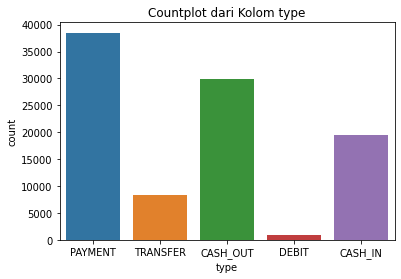

KOLOM type
Jumlah Kategori Unik: 5
Daftar Kategori Unik: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Value Counts tiap Kategori Unik:
PAYMENT     38478
CASH_OUT    29839
CASH_IN     19561
TRANSFER     8371
DEBIT         976
Name: type, dtype: int64


2 . Analisis kolom amount


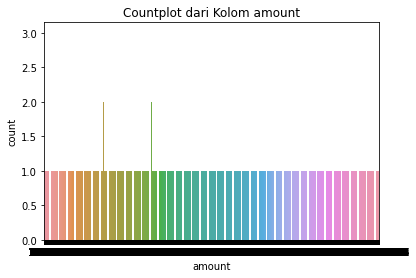

KOLOM amount
Jumlah Kategori Unik: 96717
Daftar Kategori Unik: [ 9839.64  1864.28   181.   ... 26450.83 12171.47  6733.59]
Value Counts tiap Kategori Unik:
29707.86      3
17320.91      3
25975.86      3
2475.13       3
89631.24      3
             ..
1307731.47    1
1189511.46    1
134621.66     1
100034.68     1
6733.59       1
Name: amount, Length: 96717, dtype: int64


3 . Analisis kolom nameOrig


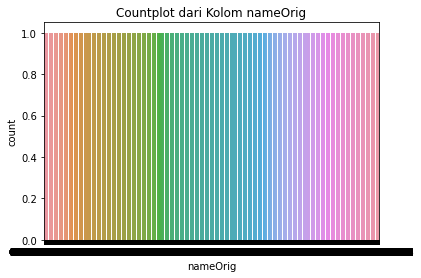

KOLOM nameOrig
Jumlah Kategori Unik: 97225
Daftar Kategori Unik: ['C1231006815' 'C1666544295' 'C1305486145' ... 'C948744009' 'C1843902873'
 'C708911726']
Value Counts tiap Kategori Unik:
C1231006815    1
C1371168750    1
C1179301157    1
C250836095     1
C2018943506    1
              ..
C148707996     1
C1306708200    1
C338578981     1
C1548699479    1
C708911726     1
Name: nameOrig, Length: 97225, dtype: int64


4 . Analisis kolom oldbalanceOrg


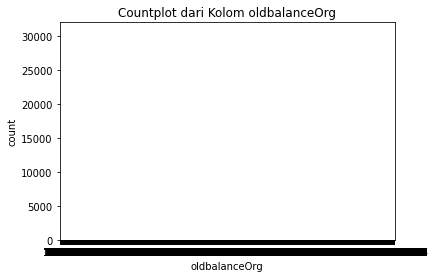

KOLOM oldbalanceOrg
Jumlah Kategori Unik: 56439
Daftar Kategori Unik: [170136.    21249.      181.   ...  25231.73  24972.59  16747.52]
Value Counts tiap Kategori Unik:
0.00         30524
164.00          22
144.00          19
101.00          19
181.00          18
             ...  
222973.66        1
7242.58          1
2402.00          1
392.00           1
16747.52         1
Name: oldbalanceOrg, Length: 56439, dtype: int64


5 . Analisis kolom newbalanceOrig


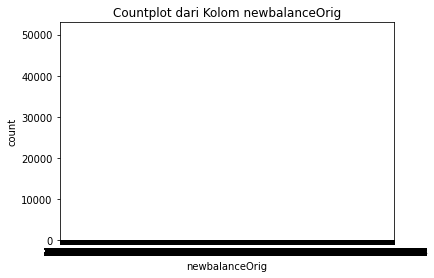

KOLOM newbalanceOrig
Jumlah Kategori Unik: 46712
Daftar Kategori Unik: [160296.36  19384.72      0.   ... 167444.41  24972.59  16747.52]
Value Counts tiap Kategori Unik:
0.00          50469
4910403.44        3
6626.14           2
44116.32          2
1601450.63        2
              ...  
9594.65           1
4977.30           1
663972.56         1
8887.62           1
16747.52          1
Name: newbalanceOrig, Length: 46712, dtype: int64


6 . Analisis kolom nameDest


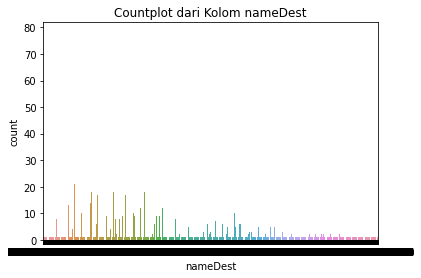

KOLOM nameDest
Jumlah Kategori Unik: 50167
Daftar Kategori Unik: ['M1979787155' 'M2044282225' 'C553264065' ... 'M1020130183' 'M2011839805'
 'M2034482538']
Value Counts tiap Kategori Unik:
C985934102     78
C248609774     71
C1286084959    71
C1590550415    69
C2083562754    66
               ..
M1725165978     1
M1377685601     1
M840591224      1
M1055570021     1
M2034482538     1
Name: nameDest, Length: 50167, dtype: int64


7 . Analisis kolom oldbalanceDest


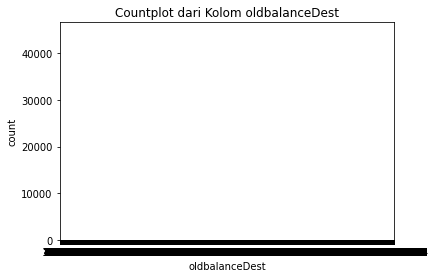

KOLOM oldbalanceDest
Jumlah Kategori Unik: 52172
Daftar Kategori Unik: [      0.     21182.     41898.   ...  425199.81   18751.39 5295996.89]
Value Counts tiap Kategori Unik:
0.00          44454
102.00            7
214.00            5
173.00            5
103.00            5
              ...  
300127.92         1
82990.00          1
1711266.75        1
334288.00         1
5295996.89        1
Name: oldbalanceDest, Length: 52172, dtype: int64


8 . Analisis kolom newbalanceDest


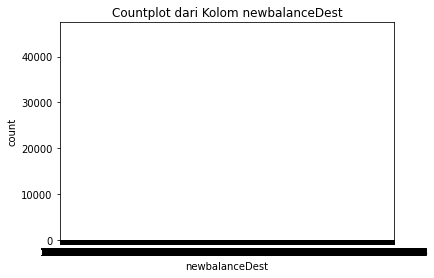

KOLOM newbalanceDest
Jumlah Kategori Unik: 18136
Daftar Kategori Unik: [      0.     40348.79  157982.12 ...  662002.73 5423466.97        nan]
Value Counts tiap Kategori Unik:
0.00           45221
971418.91         32
19169204.93       29
16532032.16       25
1254956.07        25
               ...  
68276.70           1
1002912.03         1
416.41             1
128158.98          1
5423466.97         1
Name: newbalanceDest, Length: 18135, dtype: int64


9 . Analisis kolom isFraud


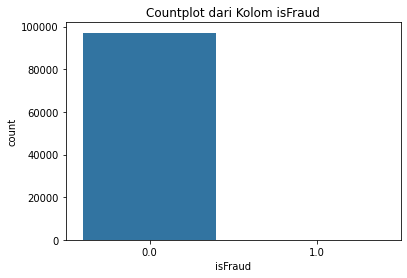

KOLOM isFraud
Jumlah Kategori Unik: 3
Daftar Kategori Unik: [ 0.  1. nan]
Value Counts tiap Kategori Unik:
0.0    97110
1.0      114
Name: isFraud, dtype: int64


10 . Analisis kolom isFlaggedFraud


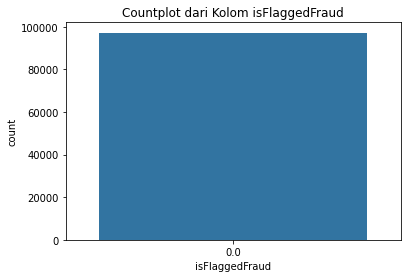

KOLOM isFlaggedFraud
Jumlah Kategori Unik: 2
Daftar Kategori Unik: [ 0. nan]
Value Counts tiap Kategori Unik:
0.0    97224
Name: isFlaggedFraud, dtype: int64




In [ ]:
def countplot(df, col):
  sns.countplot(x = col, data = df)
  plt.title(f"Countplot dari Kolom {col}")
  plt.show()

no = 1
for col in dataset.columns:
  if dataset[col].dtype != np.int64:
    print(no, ". Analisis kolom", col)
    countplot(dataset, col)
    print('KOLOM', col)
    print('Jumlah Kategori Unik:', len(dataset[col].unique()))
    print('Daftar Kategori Unik:', dataset[col].unique())
    print('Value Counts tiap Kategori Unik:')
    print(dataset[col].value_counts())
    print('')
    print('')
    no+=1


In [ ]:
# 1. Tipe transactions yang merupakan fraud
print('\n Tipe transaksi yang merupakan fraud adalah {}'.format(\
list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
dfFraudCashout = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]

print ('\n Jumlah fraud untuk TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n Jumlah fraud untuk CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 Tipe transaksi yang merupakan fraud adalah ['TRANSFER', 'CASH_OUT']

 Jumlah fraud untuk TRANSFERs = 56

 Jumlah fraud untuk CASH_OUTs = 58


In [ ]:
# 3.
print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(dataset.loc[dataset.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originator accounts for CASH_IN transactions? False


## PREPROCESSING

In [ ]:
dataset=dataset.dropna()

In [ ]:
#Remove kolom / variabel yang tidak dapat diperhitungkan
dataset=dataset.drop(columns=['step', 'nameOrig','nameDest','isFlaggedFraud'])
dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0
...,...,...,...,...,...,...,...
97219,PAYMENT,10811.91,1009.0,0.00,0.0,0.0,0.0
97220,PAYMENT,17011.46,0.0,0.00,0.0,0.0,0.0
97221,PAYMENT,1680.50,0.0,0.00,0.0,0.0,0.0
97222,PAYMENT,26450.83,0.0,0.00,0.0,0.0,0.0


In [ ]:
#MinMaxScaler untuk menangani imbalance class
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
dataset[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = min_max_scaler. fit_transform(dataset[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])
dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,0.000984,0.005034,0.004713,0.000000,0.0,0.0
1,PAYMENT,0.000186,0.000629,0.000570,0.000000,0.0,0.0
2,TRANSFER,0.000018,0.000005,0.000000,0.000000,0.0,1.0
3,CASH_OUT,0.000018,0.000005,0.000000,0.000623,0.0,1.0
4,PAYMENT,0.001167,0.001230,0.000879,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
97219,PAYMENT,0.001081,0.000030,0.000000,0.000000,0.0,0.0
97220,PAYMENT,0.001701,0.000000,0.000000,0.000000,0.0,0.0
97221,PAYMENT,0.000168,0.000000,0.000000,0.000000,0.0,0.0
97222,PAYMENT,0.002645,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
#OneHotEncoding untuk column Type
dataset=pd.get_dummies(dataset)
dataset

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000984,0.005034,0.004713,0.000000,0.0,0.0,0,0,0,1,0
1,0.000186,0.000629,0.000570,0.000000,0.0,0.0,0,0,0,1,0
2,0.000018,0.000005,0.000000,0.000000,0.0,1.0,0,0,0,0,1
3,0.000018,0.000005,0.000000,0.000623,0.0,1.0,0,1,0,0,0
4,0.001167,0.001230,0.000879,0.000000,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
97219,0.001081,0.000030,0.000000,0.000000,0.0,0.0,0,0,0,1,0
97220,0.001701,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1,0
97221,0.000168,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1,0
97222,0.002645,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1,0


## MODELLING

In [ ]:
from sklearn.model_selection import train_test_split

#Split Dataset menjadi fitur dan target
y=dataset['isFraud']
X=dataset.drop(['isFraud'], axis=1)
#Penanganan Kasus Imbalance Class menggunakan randomsoverampler
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
y.count()

97224

In [ ]:
#Split data menjadi data test dan data training
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)

In [ ]:
#Decision Tree
from sklearn import tree
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

DCT = tree.DecisionTreeClassifier()
DCT.fit(X_train,y_train)
SVM = svm.SVC()
SVM.fit(X_train,y_train)
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

model_list=[RF,DCT,SVM]


RandomForestClassifier()


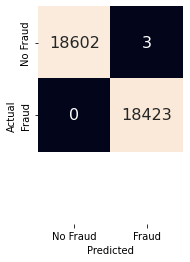

DecisionTreeClassifier()


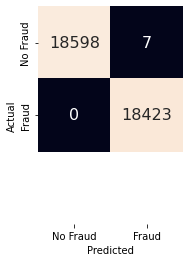

SVC()


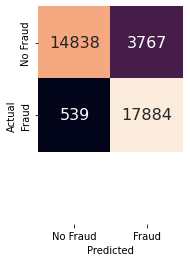

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

for model in model_list :
  print(str(model))
  labels=['No Fraud', 'Fraud']
  cm = confusion_matrix(y_test, model.predict(X_test))
  df_cm = pd.DataFrame(cm, labels, labels)
  ax = sn.heatmap(df_cm, annot=True, annot_kws={'size': 16}, square=True, cbar=False, fmt='g')
  ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  ax.invert_yaxis() #optional
  plt.show()

In [ ]:
for model in model_list :
  print(model)
  print(classification_report(y_test, model.predict(X_test)))


RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18605
         1.0       1.00      1.00      1.00     18423

    accuracy                           1.00     37028
   macro avg       1.00      1.00      1.00     37028
weighted avg       1.00      1.00      1.00     37028

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18605
         1.0       1.00      1.00      1.00     18423

    accuracy                           1.00     37028
   macro avg       1.00      1.00      1.00     37028
weighted avg       1.00      1.00      1.00     37028

SVC()
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     18605
         1.0       0.83      0.97      0.89     18423

    accuracy                           0.88     37028
   macro avg       0.90      0.88      0.88     37028
weighted avg      